<a href="https://colab.research.google.com/github/seraj94ai/hand/blob/master/arabic_deaf_hand_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!rm -fR hand
!git clone https://github.com/seraj94ai/hand

Cloning into 'hand'...
remote: Enumerating objects: 575, done.
remote: Counting objects: 100% (575/575), done.
remote: Compressing objects: 100% (570/570), done.
remote: Total 575 (delta 5), reused 575 (delta 5), pack-reused 0
Receiving objects: 100% (575/575), 8.53 MiB | 16.12 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [3]:
# Importing the Keras libraries and packages
from keras.models import Sequential # initialize NN
from keras.layers import Convolution2D # convolutional step
from keras.layers import MaxPooling2D
from keras.layers import Flatten  
from keras.layers import Dropout, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
nb_filters1 = 32
nb_filters2 = 64
conv1_size = 3
conv2_size = 2
pool_size = 2
classes_num = 5
lr = 0.0004
input_shape = (64, 64, 3)

In [0]:
img_generator = ImageDataGenerator(rotation_range=2, width_shift_range=0.01,
                                   height_shift_range=0.01, shear_range=0.02,
                                   zoom_range=0.03, channel_shift_range=4.,
                                   horizontal_flip=True, vertical_flip=True,
                                   fill_mode='nearest')

In [6]:
training_set = img_generator.flow_from_directory('./hand/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = img_generator.flow_from_directory('./hand/test', # working directory folder
                                            target_size = (64, 64), #expected size of image in cnn modle //sizing imae to 64*64
                                            batch_size = 32,      # number of images that go throw cnn after which W will be ubdate
                                            class_mode = 'categorical') # tow classes cats and dogs

training_set.class_indices


Found 409 images belonging to 5 classes.
Found 145 images belonging to 5 classes.


{'A': 0, 'B': 1, 'J': 2, 'L': 3, 'S': 4}

In [7]:
classifier = Sequential()
classifier.add(Convolution2D(nb_filters1, conv1_size, conv1_size, border_mode ="same", input_shape = input_shape))
classifier.add(Activation("relu"))
classifier.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

classifier.add(Convolution2D(nb_filters2, conv2_size, conv2_size, border_mode ="same"))
classifier.add(Activation("relu"))
classifier.add(MaxPooling2D(pool_size=(pool_size, pool_size), dim_ordering='th'))

classifier.add(Flatten())
classifier.add(Dense(128))
classifier.add(Activation("relu"))
classifier.add(Dropout(0.5))
classifier.add(Dense(classes_num, activation='softmax'))

classifier.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=lr),
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(607, 611,..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:

classifier.fit_generator(training_set,
                         steps_per_epoch = 30, # number of images in traning set
                         epochs = 2,
                         validation_data = test_set,
                         validation_steps = 15) # number of images in test set

Instructions for updating:
Use tf.cast instead.
Epoch 1/2


In [16]:
history =model.fit_generator(training_set,
                         steps_per_epoch = 30, #// batch_size,
                         epochs = 40,
                         validation_data = test_set,
                         validation_steps = 15) # number of images in test set

Epoch 1/40
30/30 [==============================] - 11s 368ms/step - loss: 0.0211 - acc: 0.9935 - val_loss: 0.0945 - val_acc: 0.9747
Epoch 2/40
30/30 [==============================] - 10s 346ms/step - loss: 0.0047 - acc: 0.9990 - val_loss: 0.0866 - val_acc: 0.9770
Epoch 3/40
30/30 [==============================] - 11s 350ms/step - loss: 0.0059 - acc: 0.9990 - val_loss: 0.1323 - val_acc: 0.9678
Epoch 4/40
30/30 [==============================] - 10s 347ms/step - loss: 0.0054 - acc: 1.0000 - val_loss: 0.1049 - val_acc: 0.9724
Epoch 5/40
30/30 [==============================] - 10s 341ms/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.1136 - val_acc: 0.9747
Epoch 6/40
30/30 [==============================] - 10s 349ms/step - loss: 0.0074 - acc: 0.9979 - val_loss: 0.1058 - val_acc: 0.9540
Epoch 7/40
30/30 [==============================] - 10s 348ms/step - loss: 0.0060 - acc: 0.9958 - val_loss: 0.0729 - val_acc: 0.9862
Epoch 8/40
30/30 [==============================] - 10s 343ms/step - 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


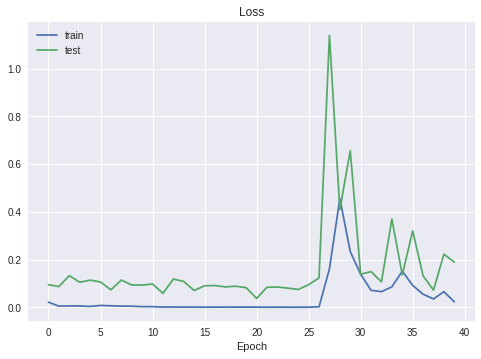

In [17]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.save('model_deaf.h5')
from google.colab import files
files.download('model_deaf.h5')

In [0]:
import numpy as np
from PIL import Image
from keras.preprocessing import image
from keras.models import load_model
import os
import matplotlib.pyplot as plt
model = load_model('model_deaf.h5')


أ


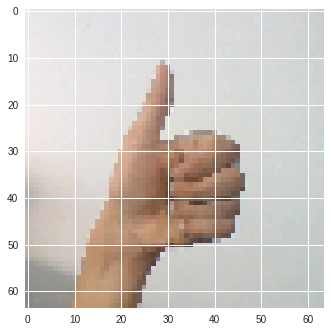

In [23]:

img = image.load_img('./hand/test/A/A_01.jpg',target_size = (64, 64)) # same target size
plt.imshow(img)

img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
y_pred = model.predict(img)
index = np.argmax(y_pred)



if index == 0:
 print(u'أ')   
elif index == 1:
 print(u'ب')  
elif index == 2:
 print(u'ج')   
elif index == 3:
 print(u'ل')   
elif index == 4:
 print(u'س')    
